In [1]:
import sys
!{sys.executable} -m pip install laspy[lazrs,laszip]
import laspy
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
import numpy as np
from shapely.geometry import Point
import random
from sklearn.preprocessing import StandardScaler

Read laz file, assign to pandas DataFrame

In [2]:
las_file = laspy.read("data/SaintLouisLiDAR.laz")

# Access scale and offset values
scale_x = las_file.header.scale[0]
offset_x = las_file.header.offset[0]
scale_y = las_file.header.scale[1]
offset_y = las_file.header.offset[1]
scale_z = las_file.header.scale[2]
offset_z = las_file.header.offset[2]

data = {
    # "X": las_file.X * scale_x + offset_x,
    # "Y": las_file.Y * scale_y + offset_y,
    # "Z": las_file.Z * scale_z + offset_z,
    "X": las_file.X,
    "Y": las_file.Y,
    "Z": las_file.Z,
    "intensity": las_file.intensity,
    "return_number": np.asarray(las_file.return_number),
    "number_of_returns": np.asarray(las_file.number_of_returns),
    "red": las_file.red,
    "green": las_file.green,
    "blue": las_file.blue
}
df = pd.DataFrame(data)
print(las_file.header.scale)
print(las_file.header.offset)
print(df.head())
print(df.isnull().sum())


len_data = len(las_file.points)

attributes_to_print = list(las_file.point_format.dimension_names)
attributes_to_print


# X,Y,Z, red, green, blue, intensity harici 0 tutmaktadır
# return_number ve number_of_returns 0 değil değişmektedir

[0.001 0.001 0.001]
[ 729000. 4301000.      -0.]
        X       Y       Z  intensity  return_number  number_of_returns    red  \
0  911303  275080  160166      12592              2                  2  17664   
1  911981  275055  160212      12944              3                  3  15872   
2  912662  275031  160258      10848              3                  3  18432   
3  913355  275006  160283       8240              3                  3  17920   
4  914036  274981  160313      15968              1                  1  17408   

   green   blue  
0  23296  17920  
1  22016  15872  
2  25344  17408  
3  24064  17920  
4  22528  18432  
X                    0
Y                    0
Z                    0
intensity            0
return_number        0
number_of_returns    0
red                  0
green                0
blue                 0
dtype: int64


['X',
 'Y',
 'Z',
 'intensity',
 'return_number',
 'number_of_returns',
 'synthetic',
 'key_point',
 'withheld',
 'overlap',
 'scanner_channel',
 'scan_direction_flag',
 'edge_of_flight_line',
 'classification',
 'user_data',
 'scan_angle',
 'point_source_id',
 'gps_time',
 'red',
 'green',
 'blue',
 'nir']

In [3]:
las_min_x, las_max_x = df["X"].min(), df["X"].max()
las_min_y, las_max_y = df["Y"].min(), df["Y"].max()

print("min and max values of points in las file")
print(f"Min X: {las_min_x}, Max X: {las_max_x}, range: {(las_max_x - las_min_x)}")
print(f"Min Y: {las_min_y}, Max Y: {las_max_y}, range: {las_max_y - las_min_y}")

min and max values of points in las file
Min X: 885001, Max X: 2385000, range: 1499999
Min Y: 246001, Max Y: 1745999, range: 1499998


In [4]:
# print values of the first point
point = las_file.points[0]
print(f"X: {point.x}, Y: {point.y}, Z: {point.z}, Intensity: {point.intensity}, classification: {point.classification}, nir: {point.nir}, return_number: {point.return_number}, number_of_returns: {point.number_of_returns}, red: {point.red}, green: {point.green}, blue: {point.blue}")


X: <ScaledArrayView(729911.303)>, Y: <ScaledArrayView(4301275.08)>, Z: <ScaledArrayView(160.166)>, Intensity: 12592, classification: 0, nir: 0, return_number: <SubFieldView(2)>, number_of_returns: <SubFieldView(2)>, red: 17664, green: 23296, blue: 17920


In [5]:
# two other way to use the point
def extract_data(point):
    return {
        "X": getattr(point, "X"),
        "Y": getattr(point, "Y"),
        "Z": getattr(point, "Z"),
        "intensity": getattr(point, "intensity"),
        "return_number": getattr(point, "return_number"),
        "number_of_returns": getattr(point, "number_of_returns"),
        "red": getattr(point, "red"),
        "green": getattr(point, "green"),
        "blue": getattr(point, "blue"),
    }




len_data = len(las_file.points)
points = las_file.points
for i in range(5):
    rand = random.randint(0, len_data)
    point = points[i]
    print(", ".join([f"{attr}: {getattr(point, attr)}" for attr in attributes_to_print]))


X: 911303, Y: 275080, Z: 160166, intensity: 12592, return_number: <SubFieldView(2)>, number_of_returns: <SubFieldView(2)>, synthetic: <SubFieldView(0)>, key_point: <SubFieldView(0)>, withheld: <SubFieldView(0)>, overlap: <SubFieldView(0)>, scanner_channel: <SubFieldView(0)>, scan_direction_flag: <SubFieldView(0)>, edge_of_flight_line: <SubFieldView(0)>, classification: 0, user_data: 0, scan_angle: 0, point_source_id: 0, gps_time: 0.0, red: 17664, green: 23296, blue: 17920, nir: 0
X: 911981, Y: 275055, Z: 160212, intensity: 12944, return_number: <SubFieldView(3)>, number_of_returns: <SubFieldView(3)>, synthetic: <SubFieldView(0)>, key_point: <SubFieldView(0)>, withheld: <SubFieldView(0)>, overlap: <SubFieldView(0)>, scanner_channel: <SubFieldView(0)>, scan_direction_flag: <SubFieldView(0)>, edge_of_flight_line: <SubFieldView(0)>, classification: 0, user_data: 0, scan_angle: 0, point_source_id: 0, gps_time: 0.0, red: 15872, green: 22016, blue: 15872, nir: 0
X: 912662, Y: 275031, Z: 16025

In [6]:
x_values = df["X"]
x_values

0           911303
1           911981
2           912662
3           913355
4           914036
            ...   
9236512    2357675
9236513    2357281
9236514    2356901
9236515    2356525
9236516    2356162
Name: X, Length: 9236517, dtype: int32

In [7]:
y_values = df["Y"]
y_values

0           275080
1           275055
2           275031
3           275006
4           274981
            ...   
9236512    1739671
9236513    1739659
9236514    1739582
9236515    1739506
9236516    1739433
Name: Y, Length: 9236517, dtype: int32

In [8]:
print(len(points))
print(points[0].X)
print(type(points))
print(type(points[0]))

9236517
911303
<class 'laspy.point.record.ScaleAwarePointRecord'>
<class 'laspy.point.record.ScaleAwarePointRecord'>


In [9]:
shape_file = gpd.read_file("data/SaintLouisTrees/SaintLouisTrees.shp")
# Swap the positions of the last and first polygons
first_polygon = shape_file.iloc[0]
last_polygon = shape_file.iloc[-1]

shape_file.iloc[0] = last_polygon
shape_file.iloc[-1] = first_polygon
print(shape_file.head())
print()
print(shape_file.shape) # 22 polygon
print(type(shape_file))
print(shape_file.columns)

   id                                           geometry
0   0  POLYGON ((731159.602 4302746.329, 731164.993 4...
1   0  POLYGON ((731285.335 4302721.912, 731280.896 4...
2   0  POLYGON ((731193.691 4302745.378, 731198.765 4...
3   0  POLYGON ((731255.844 4302725.717, 731245.380 4...
4   0  POLYGON ((731225.402 4302733.327, 731214.620 4...

(22, 2)
<class 'geopandas.geodataframe.GeoDataFrame'>
Index(['id', 'geometry'], dtype='object')


[(731185.8428510817, 4302629.3161971895), (731184.8915286822, 4302621.388510525), (731176.329627085, 4302621.388510525), (731175.6954121514, 4302625.510907592), (731174.7440897516, 4302631.85305692), (731182.3546689496, 4302633.438594255), (731185.8428510817, 4302629.3161971895)]


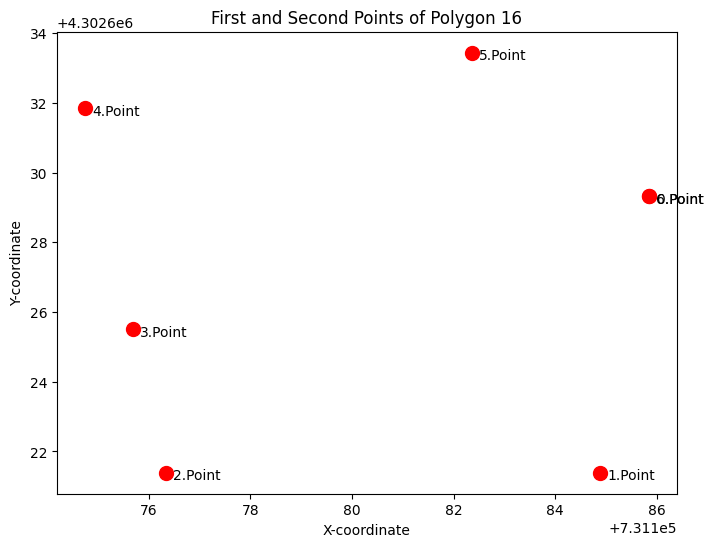

In [10]:
# plot the points of 17. polygon at index 16
shape_file.drop('id', axis=1, inplace=True)
list_16 = list(shape_file.loc[16, "geometry"].exterior.coords)
print(list_16)


# Create a plot
plt.figure(figsize=(8, 6))
for i in range(len(list_16)):
    plt.plot(list_16[i][0], list_16[i][1], 'o', color='red', markersize=10)
    plt.annotate(
        f"{i}." "Point",
        xy=(list_16[i][0], list_16[i][1]),
        xytext=(5, -5),
        textcoords='offset points',
    )
# Add labels and title
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.title("First and Second Points of Polygon 16")

# Show the plot
plt.show()



In [11]:
import cv2 as cv

# pixel values of png file is 0 or 220
# so we convert it to 0 or 1
# 0 means tree, 1 means not tree
ground_truth = cv.imread("data/SaintLouisTrees/SaintLouisTrees.png", cv.IMREAD_GRAYSCALE)
ret, thresh = cv.threshold(ground_truth, 127, 1, cv.THRESH_BINARY)
print(thresh.shape)


(3001, 3001)


In [12]:
ground_truth_size = ground_truth.shape[0]

In [13]:
def get_row_pixel_index_of_point(point_y):
    pixel_range = (las_max_x - las_min_x) / ground_truth_size
    return int(ground_truth_size - ((point_y - las_min_y) // pixel_range) - 1)

def get_col_pixel_index_of_point(point_x):
    pixel_range = (las_max_y - las_min_y) / ground_truth_size
    return int(ground_truth_size - ((point_x - las_min_x) // pixel_range) - 1)

index = random.randint(0, len(df) - 1)

print((index))
print(f"number is : {df.loc[index, 'Y']}")
print(f"number is : {df['Y'][index]}")
print(get_row_pixel_index_of_point(df["Y"][0]))
print(get_col_pixel_index_of_point(df["Y"][len_data - 1]))
# df["is_tree"] = thresh[get_row_pixel_index_of_point(df["Y"])][get_col_pixel_index_of_point(df["X"])]
# df.head()

464190
number is : 432859
number is : 432859
2942
1291


In [14]:
# Normalize LAS coordinates to match the range of the ground truth image
normalized_x = ((df.X - df.X.min()) / (df.X.max() - df.X.min()) * (ground_truth.shape[1] - 1)) 
normalized_y = ground_truth_size - ((df.Y - df.Y.min()) / (df.Y.max() - df.Y.min()) * (ground_truth.shape[0] - 1)) -1

print(normalized_x.max(), normalized_x.min())

# Round to the nearest integer to get pixel indices
pixel_indices_x = np.round(normalized_x).astype(int)
pixel_indices_y = np.round(normalized_y).astype(int)

print()
print((pixel_indices_x[(df[df['X'] > 890000]['X'].min()) & (df.Y.min())]))
print()

print((pixel_indices_x[df.Y.min()]))
print(pixel_indices_x[:5])
print((pixel_indices_x.max(), pixel_indices_x.min()))
print((pixel_indices_y.max(), pixel_indices_y.min()))

# Map LAS points to ground truth values
df["is_tree"] = thresh[pixel_indices_y, pixel_indices_x]
print(df["is_tree"][278])
print(thresh[3000][10])

3000.0 0.0

278

111
0    53
1    54
2    55
3    57
4    58
Name: X, dtype: int32
(3000, 0)
(3000, 0)
1
1


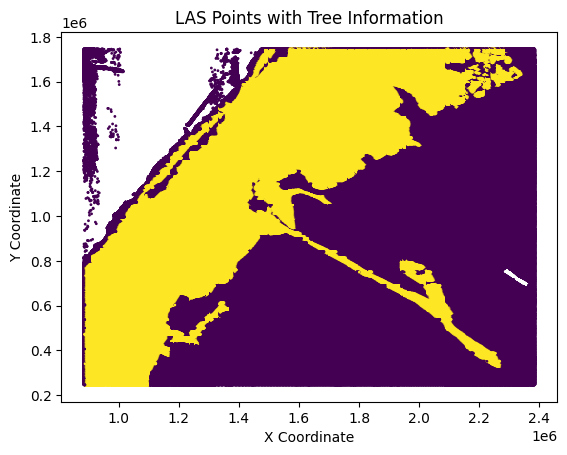

In [15]:
plt.scatter(df.X, df.Y, c=df.is_tree, cmap='viridis', s=1)  # Adjust the colormap as needed
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("LAS Points with Tree Information")
plt.show()

In [16]:
range_y = las_max_y - las_min_y
limit_y = las_min_y + range_y * 0.5
train_df = df[df["Y"] < limit_y]
test_df = df[df["Y"] >= limit_y]
print(len(train_df), len(test_df))
print(len(df))
train_df.head()

5419135 3817382
9236517


,X,Y,Z,intensity,return_number,number_of_returns,red,green,blue,is_tree
0,911303,275080,160166,12592,2,2,17664,23296,17920,1
1,911981,275055,160212,12944,3,3,15872,22016,15872,1
2,912662,275031,160258,10848,3,3,18432,25344,17408,1
3,913355,275006,160283,8240,3,3,17920,24064,17920,1
4,914036,274981,160313,15968,1,1,17408,22528,18432,1


In [17]:
train_df.loc[:, ['X', 'Y', 'Z', 'intensity', 'red', 'green', 'blue']] = StandardScaler().fit_transform(train_df[['X', 'Y', 'Z', 'intensity', 'red', 'green', 'blue']])
test_df.loc[:, ['X', 'Y', 'Z', 'intensity', 'red', 'green', 'blue']] = StandardScaler().fit_transform(test_df[['X', 'Y', 'Z', 'intensity', 'red', 'green', 'blue']])
train_df.head()

,X,Y,Z,intensity,return_number,number_of_returns,red,green,blue,is_tree
0,-1.282253,-1.572535,-1.295224,0.147502,2,2,-0.488632,-0.421337,-0.469266,1
1,-1.280819,-1.572651,-1.292033,0.193050,3,3,-0.661024,-0.559393,-0.748021,1
2,-1.279378,-1.572762,-1.288841,-0.078170,3,3,-0.414750,-0.200447,-0.538955,1
3,-1.277912,-1.572878,-1.287107,-0.415642,3,3,-0.464005,-0.338503,-0.469266,1
4,-1.276471,-1.572994,-1.285025,0.584353,1,1,-0.513259,-0.504170,-0.399578,1


In [18]:
x_train = train_df[["X", "Y", "Z", "intensity", "return_number", "number_of_returns", "red", "green", "blue"]]
y_train = train_df["is_tree"]
x_test = test_df[["X", "Y", "Z", "intensity", "return_number", "number_of_returns", "red", "green", "blue"]]
y_test = test_df["is_tree"]

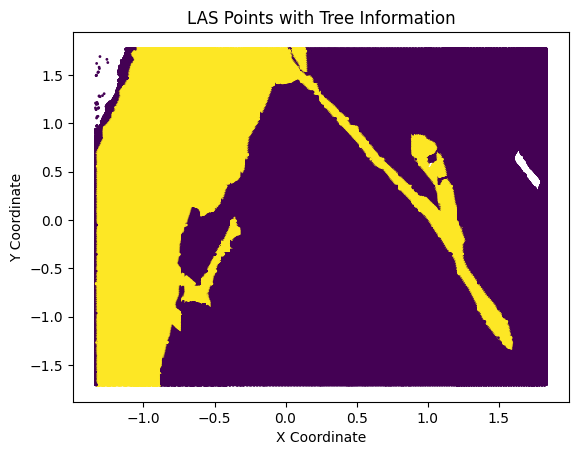

In [19]:
plt.scatter(train_df.X, train_df.Y, c=train_df.is_tree, cmap='viridis', s=1)  # Adjust the colormap as needed
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("LAS Points with Tree Information")
plt.show()

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_hat = knn.predict(x_test)
print(accuracy_score(y_test, y_hat))

In [ ]:
# from sklearn.svm import SVC
# svm = SVC()
# svm.fit(df[['X', 'Y', 'Z', 'intensity','return_number', 'number_of_returns', 'red', 'green', 'blue']], df['is_tree'])
# y_hat = svm.predict(df[['X', 'Y', 'Z', 'intensity','return_number', 'number_of_returns', 'red', 'green', 'blue']])
# print(accuracy_score(df['is_tree'], y_hat))

In [ ]:
# plt.scatter(df.X, df.Y, c=df.is_tree, cmap='viridis', s=1)  # Adjust the colormap as needed
# plt.xlabel("X Coordinate")
# plt.ylabel("Y Coordinate")
# plt.title("LAS Points with Tree Information")
# plt.show()

In [ ]:
# # Map LAS coordinates to pixel coordinates
# x_pixels = np.floor((df["X"] - las_min_x) / (las_max_x - las_min_x) * (ground_truth_size - ground_truth_size)).astype(int)
# y_pixels = np.floor((df["Y"] - las_min_y) / (las_max_y - las_min_y) * (ground_truth_size - ground_truth_size)).astype(int)

# # Filter points within the valid pixel range
# valid_points_mask = np.logical_and.reduce([
#     (x_pixels >= 0), (x_pixels < ground_truth_size),
#     (y_pixels >= 0), (y_pixels < ground_truth_size)
# ])

# # Extract pixel values corresponding to LAS points
# pixel_values = ground_truth[y_pixels[valid_points_mask], x_pixels[valid_points_mask]]

# # Now, 'pixel_values' contains the pixel values corresponding to LAS points

# # Example: Print the first 10 pixel values
# print(pixel_values[:10])

[(731185.8428510817, 4302629.3161971895), (731184.8915286822, 4302621.388510525), (731176.329627085, 4302621.388510525), (731175.6954121514, 4302625.510907592), (731174.7440897516, 4302631.85305692), (731182.3546689496, 4302633.438594255), (731185.8428510817, 4302629.3161971895)]
7
POLYGON ((731185.8428510817 4302629.3161971895, 731184.8915286822 4302621.388510525, 731176.329627085 4302621.388510525, 731175.6954121514 4302625.510907592, 731174.7440897516 4302631.85305692, 731182.3546689496 4302633.438594255, 731185.8428510817 4302629.3161971895))


<Axes: >

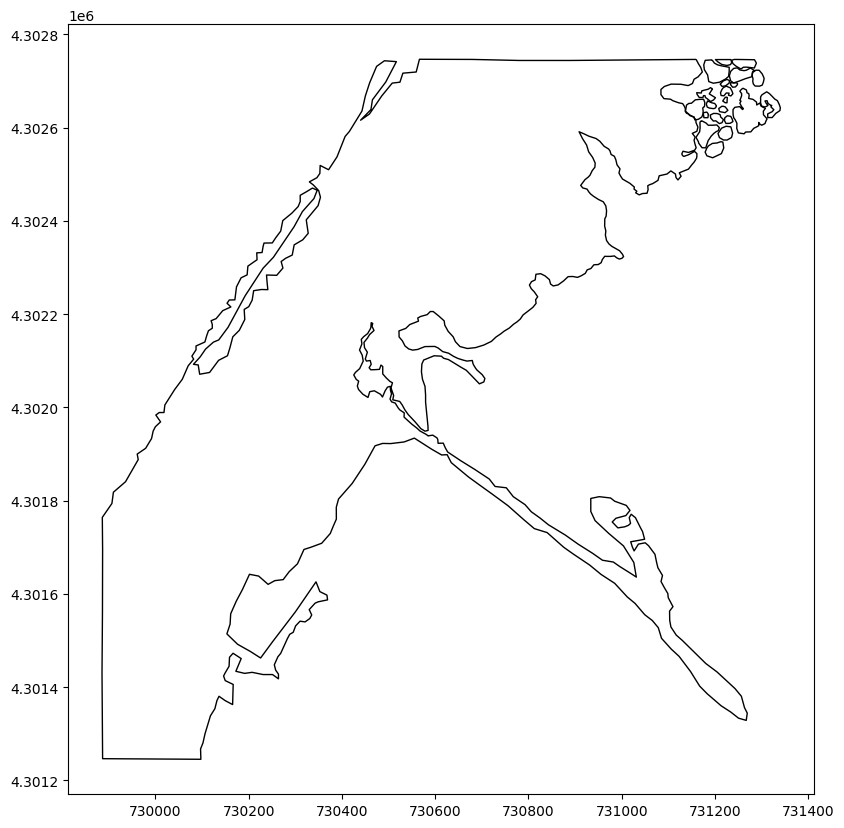

In [ ]:
shape_file.plot(figsize=(10,10), edgecolor="k", facecolor="none") # color="green"

In [ ]:
# geometry = [Point(getattr(point, "X"), getattr(point, "Y")) for point in points]
# print(type(geometry))

In [ ]:
# # xy_points = pd.Series([Point(xy) for xy in zip(x_values, y_values)])
xy_points = gpd.GeoSeries(df.apply(lambda row: Point(row['X'], row['Y']), axis=1))

# Created random 50 point and found inside or outside the Ground Truth

In [ ]:
random_indices = random.sample(range(len_data), 50)

random_points = [xy_points[index] for index in random_indices]
random_points_gdf = gpd.GeoDataFrame(geometry=random_points)

for i in range(50):
    random_points_gdf.at[i,"inside_polygon"] = any(xy_points[random_indices[i]].within(poly) for poly in shape_file['geometry'])
    print(f"Point {xy_points[random_indices[i]]} in {random_indices[i]}.index: {any(xy_points[random_indices[i]].within(poly) for poly in shape_file['geometry'])}")

print(type(random_points_gdf.loc[0, "inside_polygon"]))
random_points_gdf['inside_polygon'] = random_points_gdf["inside_polygon"].astype('int32')
print(random_points_gdf.dtypes)
# label = xy_points[:5].apply(lambda point: any(point.within(poly) for poly in shape_file["geometry"]))


Point POINT (1274281 1370533) in 6340596.index: False
Point POINT (1757626 1208438) in 6985632.index: False
Point POINT (2062684 571750) in 4286368.index: False
Point POINT (1472063 1723926) in 6816454.index: False
Point POINT (1188874 656433) in 2266657.index: False
Point POINT (2081540 522145) in 4232899.index: False
Point POINT (2204095 1149940) in 8017277.index: False
Point POINT (1015220 440032) in 408246.index: False
Point POINT (1579884 1329659) in 6562426.index: False
Point POINT (1655016 1257401) in 6983233.index: False
Point POINT (2383424 421178) in 4029814.index: False
Point POINT (1334622 1233618) in 5953619.index: False
Point POINT (2258181 852536) in 5209662.index: False
Point POINT (1488353 942763) in 3328721.index: False
Point POINT (1879648 687746) in 4185965.index: False
Point POINT (2125137 1327874) in 7710073.index: False
Point POINT (1045238 363814) in 351336.index: False
Point POINT (2046740 1192227) in 7237275.index: False
Point POINT (1286650 1354109) in 634768

In [ ]:

# df["is_tree"] = False
# for i in range(len_data):
#     for poly in shape_file['geometry']:
#         if xy_points[i].within(poly):
#             df.at[i, "is_tree"] = True
#             break  # Bir polygon içinde olduğunda döngüden çık
        
# df['is_tree'] = df["is_tree"].astype('int32')

KeyboardInterrupt: 

# Plot the selected 50 points and define them inside or outside

Point POINT (729947.047 4301402.637) in 211269.index: Inside
Point POINT (731256.136 4301974.55) in 5353039.index: Outside
Point POINT (730163.648 4302094.311) in 5563397.index: Inside
Point POINT (730820.346 4302422.293) in 7520585.index: Inside
Point POINT (730672.201 4302201.723) in 6971472.index: Inside
Point POINT (730231.92 4302255.963) in 5822048.index: Outside
Point POINT (731047.67 4301874.219) in 4816945.index: Outside
Point POINT (730258.59 4301676.873) in 2455483.index: Inside
Point POINT (730894.08 4302073.434) in 6930044.index: Outside
Point POINT (731377.982 4302500.269) in 8432709.index: Outside
Point POINT (730277.898 4301765.779) in 2812974.index: Inside
Point POINT (730997.865 4301859.898) in 4660113.index: Outside
Point POINT (730630.818 4302275.262) in 6524860.index: Inside
Point POINT (730619.378 4301841.721) in 3272940.index: Outside
Point POINT (731270.942 4301650.136) in 5056347.index: Outside
Point POINT (730332.521 4301563.661) in 2193979.index: Outside
Point

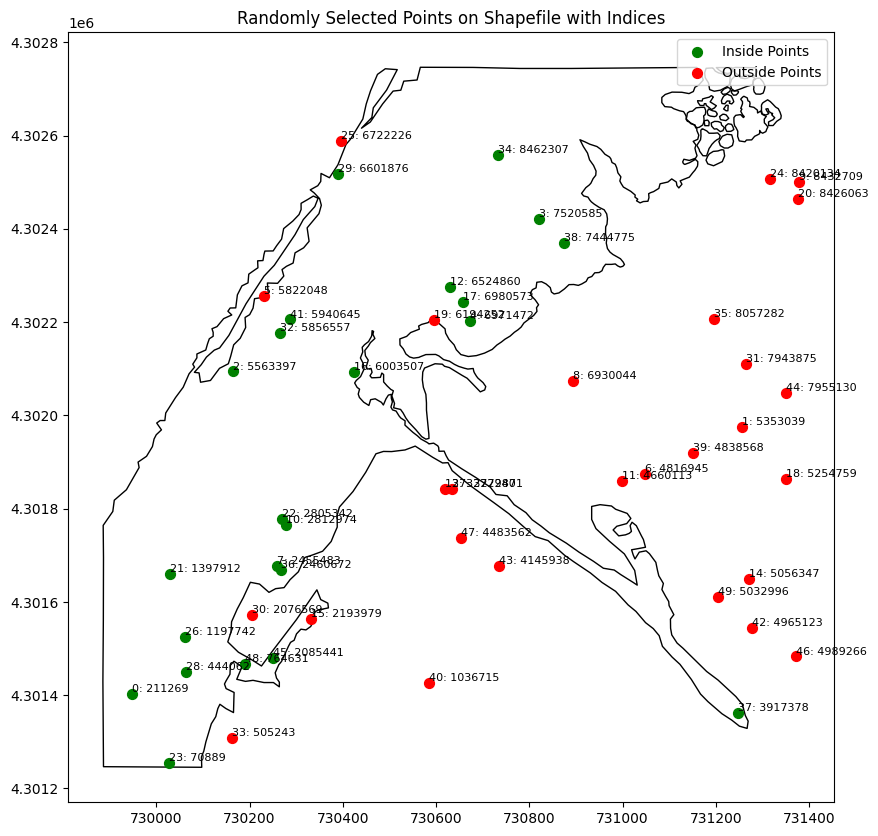

In [ ]:
# Build a spatial index for the shapefile
sindex = shape_file.sindex

# Find indices of points near each random point
nearby_point_indices = []
for random_point in random_points_gdf['geometry']:
    possible_matches_index = list(sindex.intersection(random_point.bounds))
    possible_matches = shape_file.iloc[possible_matches_index]
    nearest_point_index = possible_matches[possible_matches.intersects(random_point)].index
    nearby_point_indices.append(nearest_point_index)

# # Create a new column in random_points_gdf to indicate whether the points are inside or outside
# random_points_gdf['inside_polygon'] = [any(index in indices for indices in nearby_point_indices) for index in random_points_gdf.index]

# Print whether each point is inside or outside the polygons
for i, rand in enumerate(random_indices):
    is_inside = random_points_gdf.loc[i, 'inside_polygon']
    print(f"Point {xy_points[rand]} in {rand}.index: {'Inside' if is_inside else 'Outside'}")

# Plot the shapefile
fig, ax = plt.subplots(figsize=(10, 10))
shape_file.plot(ax=ax, edgecolor='black', facecolor='none', aspect="equal")

# Plot the randomly selected points
random_points_gdf[random_points_gdf['inside_polygon'] == True].plot(ax=ax, color='green', marker='o', markersize=50, label='Inside Points')
random_points_gdf[random_points_gdf['inside_polygon'] == False].plot(ax=ax, color='red', marker='o', markersize=50, label='Outside Points')

lower_left_corner = df[(df['X'] == df['X'].min()) & (df['Y'] == df['Y'].min())]

# plt.plot(df[df["X"] == df["X"].max() and df["Y"] == df["Y"].min(), "X"], df[df['X'] == df["X"].max() and df["Y"] == df["Y"].min(),'Y'], marker="o", color="blue")
plt.plot(lower_left_corner["X"], lower_left_corner["Y"], marker="o", color="blue", markersize=50)
print(f"X: {df['X'].min()} Y: {df['Y'].min()}")


# Annotate the points with their indices
for i, point in enumerate(random_points_gdf['geometry']):
    ax.text(point.x, point.y, f"{i}: {random_indices[i]}", fontsize=8, ha='left', va='bottom')

# Add labels or legends if needed
plt.title('Randomly Selected Points on Shapefile with Indices')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Plot the shapefile
fig, ax = plt.subplots(figsize=(10, 10))
shape_file.plot(ax=ax, edgecolor='black', facecolor='none', aspect="equal")

# Plot the randomly selected points
df[df['is_tree'] == True].plot(ax=ax, color='green', marker='o', markersize=50, label='Inside Points')
df[df['is_tree'] == False].plot(ax=ax, color='red', marker='o', markersize=50, label='Outside Points')

lower_left_corner = df[(df['X'] == df['X'].min()) & (df['Y'] == df['Y'].min())]

# plt.plot(df[df["X"] == df["X"].max() and df["Y"] == df["Y"].min(), "X"], df[df['X'] == df["X"].max() and df["Y"] == df["Y"].min(),'Y'], marker="o", color="blue")
# plt.plot(lower_left_corner["X"], lower_left_corner["Y"], marker="o", color="blue", markersize=50)
# print(f"X: {df['X'].min()} Y: {df['Y'].min()}")


# Annotate the points with their indices
# for i, point in enumerate(random_points_gdf['geometry']):
#     ax.text(point.x, point.y, f"{i}: {random_indices[i]}", fontsize=8, ha='left', va='bottom')

# Add labels or legends if needed
plt.title('Randomly Selected Points on Shapefile with Indices')
plt.legend()

# Show the plot
plt.show()

Point POINT (1186790 1221198) in 5808351.index: Outside ??


False
POLYGON ((731159.6022082231 4302746.32885235, 731164.9930351551 4302736.181413422, 731169.4325396871 4302729.205049157, 731172.9207218193 4302719.374717694, 731163.7246052888 4302708.910171296, 731155.1627036917 4302703.836451832, 731151.6745215594 4302694.640335302, 731142.4784050295 4302690.20083077, 731126.9401391674 4302693.054797967, 731106.0110463747 4302693.371905436, 731091.4241029138 4302688.298185969, 731084.1306311822 4302681.956036639, 731084.130631182 4302670.857275309, 731090.4727805128 4302662.295373711, 731104.7426165083 4302661.026943846, 731109.499228507 4302657.855869179, 731121.8664197031 4302653.4163646465, 731130.7454287662 4302651.513719848, 731133.5993959655 4302647.074215317, 731135.819148232 4302642.634710786, 731136.7704706311 4302637.560991322, 731137.0875780974 4302635.024131588, 731145.0152647621 4302627.730659856, 731152.6258439588 4302623.608262792, 731158.9679932912 4302617.26611346, 731159.2851007573 4302610.923964128, 731163.4074978237 4302601.0

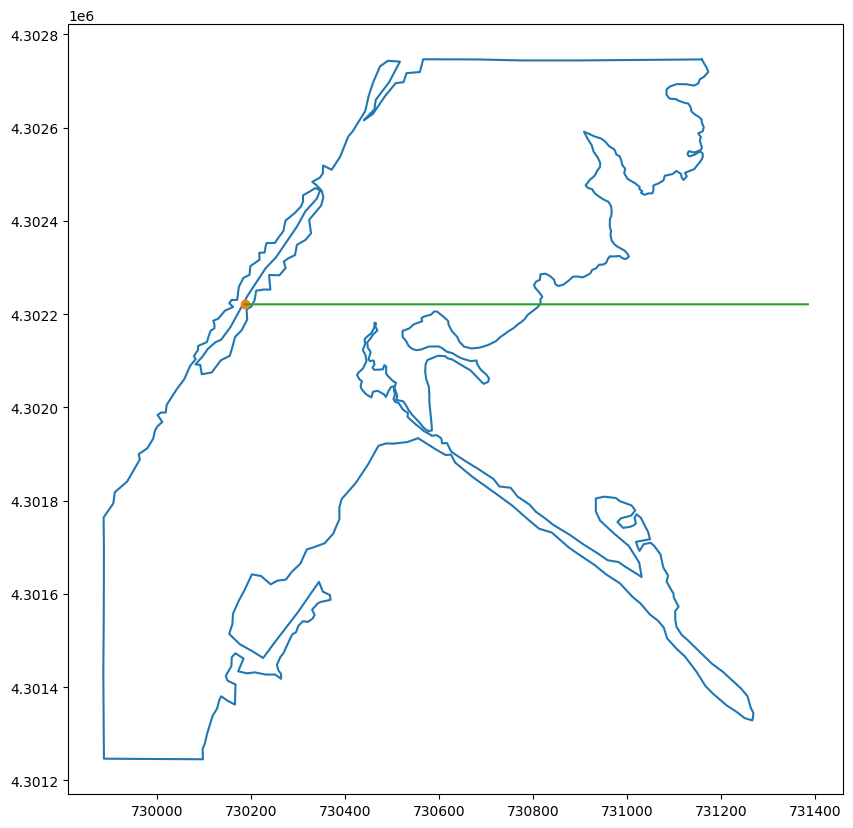

In [ ]:
print(xy_points[5808351].within(shape_file.loc[21, "geometry"]))
print(shape_file.loc[21, "geometry"])
# Plot the shapefile
fig, ax = plt.subplots(figsize=(10, 10))
x, y = shape_file.loc[21,"geometry"].exterior.xy
plt.plot(x,y)
plt.plot(xy_points[5808351].x, xy_points[5808351].y, marker="o")
x = np.linspace(int(xy_points[5808351].x), int(las_max_x), int(las_max_x) - int(xy_points[5808351].x))
y = np.full((len(x)), xy_points[5808351].y)
plt.plot(x, y)
plt.show()


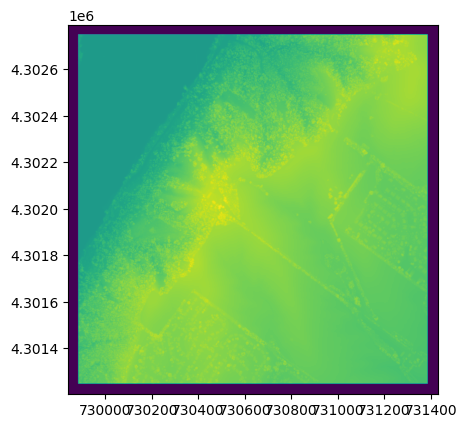

3175 3176
<class 'rasterio.io.DatasetReader'>
BoundingBox(left=729840.9373750874, bottom=4301202.786778949, right=731428.4373750874, top=4302790.786778949)
| 0.50, 0.00, 729840.94|
| 0.00,-0.50, 4302790.79|
| 0.00, 0.00, 1.00|
(729840.9373750874, 4302790.786778949)
(731428.4373750874, 4301202.786778949)
(3176, 3175)
0.0


In [ ]:

tif_file = rasterio.open("data/SaintLouisDSM/SaintLouisDSM.tif")
show(tif_file)
print(tif_file.width, tif_file.height)
print(type(tif_file))
print(tif_file.bounds)
print(tif_file.transform)
print(tif_file.transform * (0,0))
print(tif_file.transform * (tif_file.width, tif_file.height))
print(tif_file.read(1).shape) # returns numpy array
print(tif_file.read(1)[0,0])